<a href="https://colab.research.google.com/github/MPetrinovic/Personal-Projects/blob/main/Rje%C5%A1enje_Modeli_strojnog_u%C4%8Denja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('schools_data.csv')
data.shape

work_data = data.copy()
work_data.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,repeated,data_perimeter
2889,RC,M,18,Urban,>3,Married,4,2,health,other,reputation,father,1,2,0,False,True,True,True,True,True,True,True,5,4,5,1,3,5,10,0,train
137,MS,F,16,Urban,>3,Married,4,3,teacher,other,other,mother,1,2,0,False,False,True,True,True,True,True,True,1,3,2,1,1,1,10,0,train
360,MS,F,15,Urban,>3,Married,2,3,other,other,other,father,2,1,0,False,True,False,True,True,True,False,False,3,5,1,1,1,5,0,0,train
6935,GP,F,15,Urban,>3,Married,4,3,services,other,reputation,mother,1,1,0,False,False,True,True,True,True,True,False,4,5,5,1,3,1,4,0,train
2265,RC,M,17,Rural,>3,Married,3,4,at_home,other,course,mother,3,2,0,False,False,False,False,True,True,False,False,5,4,5,2,4,5,0,1,validation


In [ ]:
work_data['sex'][work_data['sex'] == 'M'] = 1
work_data['sex'][work_data['sex'] == 'F'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
work_data['address'][work_data['address'] == 'Urban'] = 1
work_data['address'][work_data['address'] == 'Rural'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
work_data['famsize'][work_data['famsize'] == '>3'] = 1
work_data['famsize'][work_data['famsize'] == '<=3'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
work_data['Pstatus'][work_data['Pstatus'] == 'Married'] = 1
work_data['Pstatus'][work_data['Pstatus'] == 'Divorced'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
TFlist = ['schoolsup', 'famsup','paid','activities','nursery','higher','internet','romantic']
work_data[TFlist] = work_data[TFlist]*1

In [ ]:
work_data['traveltime'][work_data['traveltime'] == 1] = '< 15'
work_data['traveltime'][work_data['traveltime'] == 2] = '15-30'
work_data['traveltime'][work_data['traveltime'] == 3] = '30-60'
work_data['traveltime'][work_data['traveltime'] == 4] = '> 60'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
work_data['studytime'][work_data['studytime'] == 1] = '<2'
work_data['studytime'][work_data['studytime'] == 2] = '2-5'
work_data['studytime'][work_data['studytime'] == 3] = '5-10'
work_data['studytime'][work_data['studytime'] == 4] = '>10'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [170]:
work_data.sample(6)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,repeated,data_perimeter
822,MS,0,16,1,1,1,3,1,services,other,course,mother,< 15,>10,0,1,1,1,0,1,1,1,0,4,3,3,1,2,5,4,0,train
3718,RC,0,17,1,1,0,4,3,services,services,course,mother,< 15,2-5,0,0,1,1,0,1,1,1,1,5,2,2,1,2,5,23,0,validation
5528,GP,0,15,0,1,1,3,4,services,teacher,course,father,15-30,5-10,2,0,1,0,0,1,1,1,1,4,2,2,2,2,5,0,1,train
6670,GP,0,16,1,1,1,4,2,teacher,services,home,mother,15-30,2-5,0,0,1,1,1,1,1,1,0,5,3,3,1,1,1,0,0,validation
3858,LT,0,15,1,1,1,2,1,services,other,reputation,father,30-60,5-10,0,0,1,0,1,1,1,1,0,5,2,2,1,1,4,4,0,train
6916,GP,1,19,1,1,1,3,3,other,other,home,other,< 15,2-5,1,0,1,0,1,1,1,1,1,4,4,4,1,1,3,20,0,train


In [ ]:
X_train = work_data[work_data['data_perimeter'] == 'train']
X_test = work_data[work_data['data_perimeter'] == 'validation']

In [ ]:
X_train = X_train.drop(['data_perimeter'],axis=1)

In [ ]:
X_test = X_test.drop(['data_perimeter'],axis=1)

In [ ]:
y_train = X_train['repeated'].values
y_test = X_test['repeated'].values

In [ ]:
X_train = X_train.drop(['repeated'],axis=1)
X_test = X_test.drop(['repeated'],axis=1)

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

(7812,)

Iskoristit ćemo tri algoritma strojnog učenja:

(1) Logističku regresiju

(2) Stablo odlučivanja

(3) Stohastički Gradient Boosting

(4) Ridge Klasifikator

(5) Neuronska mreža

**1. Logistička regresija**

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1','elasticnet’']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=cv, 
                           scoring='accuracy',
                           error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.870754 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1392,  210],
       [ 199,  554]])

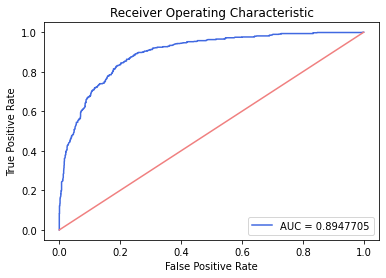

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_prob = grid_search.predict_proba(X_test)
          
fpr, tpr, threshold = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'royalblue', label = 'AUC = %0.7f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'lightcoral')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ACC = $87\%$, AUC=$0.89$ 

**Stablo odlučivanja**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
criterion = ['gini','entropy']
max_depth = range(1,10)
min_samples_split = range(1,10)
min_samples_leaf = range(1,5)

In [ ]:
grid = dict(criterion = criterion, 
            max_depth = max_depth,
            min_samples_split = min_samples_split,
            min_samples_leaf = min_samples_leaf)

cv = RepeatedStratifiedKFold(n_splits=10, 
                             n_repeats=3, 
                             random_state=1)

grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=cv, 
                           scoring='accuracy',
                           error_score=0)

grid_result = grid_search.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.895332 using {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1439,  163],
       [ 169,  584]])

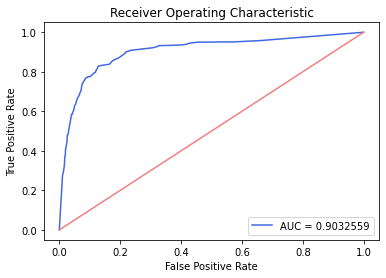

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_prob = grid_search.predict_proba(X_test)
          
fpr, tpr, threshold = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'royalblue', label = 'AUC = %0.7f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'lightcoral')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ACC = $89\%$, AUC=$0.903$ 

**SCV**

In [ ]:
from sklearn.svm import SVC

In [171]:
model = SVC(probability=True)
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [172]:
grid = dict(kernel=kernel,
            C=C,gamma=gamma)

cv = RepeatedStratifiedKFold(n_splits=3, 
                             n_repeats=1, 
                             random_state=1)

grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=2, 
                           cv=cv, 
                           scoring='accuracy',
                           error_score=0)

grid_result = grid_search.fit(X_train, y_train)

In [173]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.885817 using {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}


In [174]:
y_pred = grid_search.predict(X_test)

In [175]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1424,  178],
       [ 154,  599]])

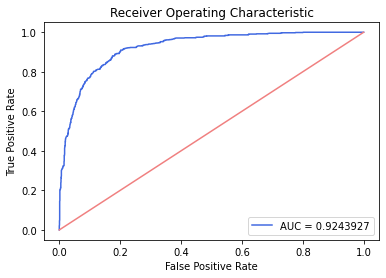

In [176]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_prob = grid_search.predict_proba(X_test)
          
fpr, tpr, threshold = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'royalblue', label = 'AUC = %0.7f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'lightcoral')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Ridge Klasifikator**

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [ ]:
grid = dict(alpha=alpha)

cv = RepeatedStratifiedKFold(n_splits=10, 
                             n_repeats=3, 
                             random_state=1)

grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=cv, 
                           scoring='accuracy',
                           error_score=0)

grid_result = grid_search.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.854797 using {'alpha': 0.4}


In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1370,  232],
       [ 216,  537]])

In [ ]:
(1370+537)/(1370+232+216+537)

0.8097664543524417

**Neuronska mreža**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def create_model(init_mode='uniform',dropout_rate=0.0,optimizer='adam'):
  model = Sequential()
  model.add(Dense(56, input_dim= 56, kernel_initializer = init_mode, activation = 'relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(40, kernel_initializer = init_mode, activation = 'relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
init_mode = ['uniform', 'normal',]
dropout_rate = [0.0, 0.1, 0.2, 0.3]
optimizer = ['SGD', 'RMSprop', 'Adam']

In [ ]:
model = KerasClassifier(build_fn = create_model, 
                        epochs=50, 
                        batch_size=10, 
                        verbose=0)

In [ ]:
param_grid = dict(dropout_rate=dropout_rate, 
                  init_mode=init_mode,
                  optimizer=optimizer)

grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    n_jobs=-1, 
                    cv=3)

grid_result = grid.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.620584 using {'dropout_rate': 0.1, 'init_mode': 'uniform', 'optimizer': 'SGD'}


In [ ]:
y_pred = grid.predict(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1450,  152],
       [ 223,  530]])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


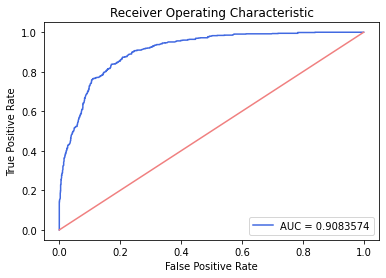

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_prob = grid.predict_proba(X_test)
          
fpr, tpr, threshold = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'royalblue', label = 'AUC = %0.7f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'lightcoral')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()